In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("train.tsv", delimiter='\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [4]:
df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [5]:
#counting the individual values 
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64

In [6]:
sentiment_mapping = {0: 'Very Negative', 1: 'Negative', 2: 'Neutral', 3: 'Positive', 4: 'Very Positive'}# mapping 
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)
sentiment_counts = df['Sentiment'].value_counts()# counting values 
print(sentiment_counts)


Sentiment
Neutral          79582
Positive         32927
Negative         27273
Very Positive     9206
Very Negative     7072
Name: count, dtype: int64


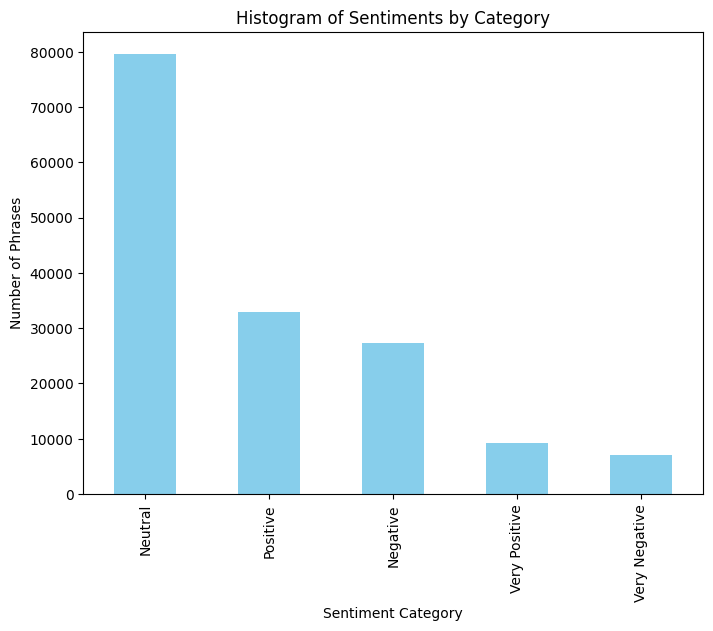

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
sentiment_counts = df['Sentiment'].value_counts()# Count the occurrences of each sentiment category in the 'Sentiment' column
plt.figure(figsize=(8, 6))# Set up the plot with a specified figure size
sentiment_counts.plot(kind='bar', color='skyblue')# Plot a bar chart representing the sentiment distribution
plt.title('Histogram of Sentiments by Category')# Add a title to the plot
plt.xlabel('Sentiment Category')# Add labels to the x and y axes
plt.ylabel('Number of Phrases')
plt.show()# Display the plot


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
df['Cleaned_Phrase'] = df['Phrase'].apply(lambda text: ' '.join(re.sub(r'[^a-zA-Z\s]', '', text).split()))# Tokenize and clean the 'Phrase' column
vectorizer = CountVectorizer()# Create a CountVectorizer instance
dtm = vectorizer.fit_transform(df['Cleaned_Phrase'])# Transform the cleaned phrases into a Document-Term Matrix (DTM)
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())# Convert the DTM to a DataFrame with feature names as columns


In [15]:
dtm_df

,aaa,aaliyah,aan,abagnale,abandon,abandoned,abbass,abbott,abbreviated,abc,...,zoe,zombie,zombieland,zone,zoning,zoolander,zoom,zucker,zwick,zzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Assuming dtm_df is your Document-Term Matrix (DTM) and df['Sentiment'] is your target variable
X = dtm_df # Features (X) are the document-term matrix
y = df['Sentiment'] # Target variable (y) is the 'Sentiment' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)# Split the dataset into training and test sets
nb_classifier = MultinomialNB()# Create a Multinomial Naive Bayes classifier
nb_classifier.fit(X_train, y_train)# Train the classifier on the training set
y_pred = nb_classifier.predict(X_test)# Make predictions on the test set
accuracy = accuracy_score(y_test, y_pred)# Compute the accuracy of the model
print("Model Accuracy:", accuracy)# Print the accuracy


Model Accuracy: 0.6110470331923619


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X = df['Phrase']# Features (X) are the 'Phrase' column
y = df['Sentiment']# Target variable (y) is the 'Sentiment' column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)# Split the dataset into training and test sets
tfidf_vectorizer = TfidfVectorizer()# Create a TfidfVectorizer instance
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)# Fit and transform the training data
X_test_tfidf = tfidf_vectorizer.transform(X_test)# Transform the test data
nb_classifier = MultinomialNB()# Create a Multinomial Naive Bayes classifier
nb_classifier.fit(X_train_tfidf, y_train)# Train the classifier on the training set
y_pred = nb_classifier.predict(X_test_tfidf)# Make predictions on the test set
accuracy = accuracy_score(y_test, y_pred)# Compute the accuracy of the model
print("TF-IDF Model Accuracy:", accuracy)# Print the accuracy


TF-IDF Model Accuracy: 0.581763424323978


In [11]:
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_watson.natural_language_understanding_v1 import Features, SentimentOptions
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

apikey = "O7HIKNLxbCzoLCOv4LiD5O4_ISp8z6HuKqjOBYO8y9Jq"
url = "https://api.au-syd.natural-language-understanding.watson.cloud.ibm.com/instances/bf2c7e4e-cad5-454c-8ef9-e5fba3dbee4c"

authenticator = IAMAuthenticator(apikey)
nlu = NaturalLanguageUnderstandingV1(
    version='2021-03-25',
    authenticator=authenticator
)
nlu.set_service_url(url)
response = nlu.analyze(
    text='none of which amounts to much of a story',
    features=Features(sentiment=SentimentOptions())
).get_result()
print("Sentiment:", response['sentiment']['document']['label'])
print("Score:", response['sentiment']['document']['score'])


/Users/kiran_g/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Sentiment: negative
Score: -0.892029


In [12]:
pip install ibm-watson

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install transformers torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis")
article = """
Claudine Gay resigned Tuesday as Harvard’s president after weeks of controversy initially sparked by her testimony at a congressional hearing on antisemitism, and later focusing on allegations of plagiarism in work she had produced throughout her academic career. (Gay’s resignation was first reported by the Harvard Crimson.) Plagiarism is a particularly serious charge in academia: In 2021, the president of the University of South Carolina, Lt. Gen. Robert L. Caslen Jr., resigned after admitting that he had plagiarized a commencement speech. Plagiarism includes a broad range of possible offenses, from improperly placing a citation to claiming credit for another scholar’s research or insight, and individual institutions develop their own policies for evaluating and responding to allegations of research misconduct. Gay defended her academic record in an op-ed published Wednesday in the New York Times, saying that she addressed attribution issues promptly after learning about them, and that “I have never misrepresented my research findings, nor have I ever claimed credit for the research of others. Moreover, the citation errors should not obscure a fundamental truth: I proudly stand by my work and its impact on the field.”
"""
result = sentiment_analysis(article)
print("Sentiment:", result[0]['label'])
print("Confidence:", result[0]['score'])


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Sentiment: POSITIVE
Confidence: 0.8526316285133362
